# AVALANCHE FORECASTING

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"C:\sravya\avalanche.csv")

In [3]:
# reading dataset

In [4]:
data

,Date/Time (PST),Relative Humidity (%),Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,25-06-2019 15:00,89.90,59,H,52,-17,19,2
1,25-06-2019 14:00,69.82,24,L,23,-8,19,0
2,25-06-2019 13:00,65.32,15,H,30,7,19,0
3,25-06-2019 12:00,54.77,27,L,61,-13,25,1
4,25-06-2019 11:00,58.87,34,H,4,-20,7,0
...,...,...,...,...,...,...,...,...
194,17-06-2019 13:00,57.73,27,L,61,-13,25,1
195,17-06-2019 12:00,57.88,34,H,4,-20,7,0
196,17-06-2019 11:00,62.53,34,L,76,-7,40,1
197,17-06-2019 10:00,65.07,34,M,73,-32,27,2


In [5]:
data.isnull().any()

Date/Time (PST)          False
Relative Humidity (%)    False
Slope                    False
Forest Density           False
Snow Density             False
Air Temperature          False
Wind                     False
Prediction               False
dtype: bool

In [6]:
data["Forest Density"].unique

<bound method Series.unique of 0      H
1      L
2      H
3      L
4      H
      ..
194    L
195    H
196    L
197    M
198    L
Name: Forest Density, Length: 199, dtype: object>

In [7]:
data["Forest Density"].value_counts()

L    74
M    63
H    62
Name: Forest Density, dtype: int64

In [8]:
#performing label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Forest Density"]=le.fit_transform(data["Forest Density"])

In [10]:
data

,Date/Time (PST),Relative Humidity (%),Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,25-06-2019 15:00,89.90,59,0,52,-17,19,2
1,25-06-2019 14:00,69.82,24,1,23,-8,19,0
2,25-06-2019 13:00,65.32,15,0,30,7,19,0
3,25-06-2019 12:00,54.77,27,1,61,-13,25,1
4,25-06-2019 11:00,58.87,34,0,4,-20,7,0
...,...,...,...,...,...,...,...,...
194,17-06-2019 13:00,57.73,27,1,61,-13,25,1
195,17-06-2019 12:00,57.88,34,0,4,-20,7,0
196,17-06-2019 11:00,62.53,34,1,76,-7,40,1
197,17-06-2019 10:00,65.07,34,2,73,-32,27,2


In [11]:
#splitting data into x and y

In [12]:
x=data.iloc[:,1:7].values
y=data.iloc[:,7:8].values

In [13]:
x

array([[ 89.9 ,  59.  ,   0.  ,  52.  , -17.  ,  19.  ],
       [ 69.82,  24.  ,   1.  ,  23.  ,  -8.  ,  19.  ],
       [ 65.32,  15.  ,   0.  ,  30.  ,   7.  ,  19.  ],
       ...,
       [ 62.53,  34.  ,   1.  ,  76.  ,  -7.  ,  40.  ],
       [ 65.07,  34.  ,   2.  ,  73.  , -32.  ,  27.  ],
       [ 74.3 ,  34.  ,   1.  ,   4.  ,   3.  ,   9.  ]])

In [14]:
y

array([[2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1],
    

In [15]:
x.shape

(199, 6)

In [16]:
y.shape

(199, 1)

In [17]:
#performing one hot encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder
one= OneHotEncoder()

In [19]:
z=one.fit_transform(x[:,2:3]).toarray()

In [20]:
z

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0

In [21]:
x.shape

(199, 6)

In [22]:
#adding one hot encoding columns

In [23]:
x=np.delete(x,2,axis=1)
x=np.concatenate((z,x),axis=1)

In [24]:
x.shape

(199, 8)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_test.shape

(40, 8)

In [27]:
x_train.shape

(159, 8)

In [28]:
#feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
x_train

array([[-0.71713717,  1.41421356, -0.6971236 , ..., -1.42749482,
         1.30204705,  1.28700118],
       [ 1.39443338, -0.70710678, -0.6971236 , ..., -0.67951054,
        -0.45584404, -0.52620428],
       [-0.71713717, -0.70710678,  1.43446586, ...,  1.23200487,
        -1.19956719, -1.21694921],
       ...,
       [-0.71713717,  1.41421356, -0.6971236 , ...,  0.60868463,
         1.64010303, -0.26717493],
       [-0.71713717, -0.70710678,  1.43446586, ..., -0.47173712,
         1.64010303, -0.6125474 ],
       [ 1.39443338, -0.70710678, -0.6971236 , ..., -0.18085434,
        -0.86151121, -0.87157675]])

In [31]:
x_test

array([[-0.5       ,  0.95118973, -0.61588176,  0.38956589,  0.52595086,
         0.77743248,  1.60052353, -0.41205959],
       [-0.5       , -1.05131497,  1.62368828, -1.4703403 ,  0.31867959,
        -0.95661766, -1.61693916,  1.05666766],
       [-0.5       ,  0.95118973, -0.61588176,  0.73813072, -0.1994986 ,
        -1.18782434,  0.81257349, -1.22801917],
       [-0.5       , -1.05131497,  1.62368828,  0.75600584, -0.92494807,
        -0.72541097, -0.96031412,  0.9750717 ],
       [-0.5       , -1.05131497,  1.62368828,  0.48787904,  0.6295865 ,
        -1.22635879, -0.6976641 , -1.06482726],
       [-0.5       , -1.05131497,  1.62368828,  0.13037665,  0.31867959,
        -0.95661766, -1.61693916,  1.05666766],
       [-0.5       ,  0.95118973, -0.61588176, -1.96726863, -0.1994986 ,
         1.58665587,  0.15594845,  1.30145554],
       [-0.5       ,  0.95118973, -0.61588176,  0.73813072,  0.52595086,
         0.77743248,  1.60052353, -0.41205959],
       [-0.5       , -1.05131497

In [32]:
#random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=37,criterion="entropy",random_state=0)
rfc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
import pickle
pickle.dump(rfc,open('fore.pkl','wb'))
pickle.dump(sc,open('scaler2.pkl','wb'))

In [35]:
rfcpred=rfc.predict(x_test)

In [36]:
rfcpred

array([1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0,
       1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0], dtype=int64)

In [37]:
y_test

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [0],
       [2],
       [0]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
rfcacc=accuracy_score(y_test,rfcpred)

In [39]:
rfcacc

0.775

In [40]:

from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, rfcpred)



In [41]:
cm

array([[[21,  3],
        [ 4, 12]],

       [[23,  2],
        [ 5, 10]],

       [[27,  4],
        [ 0,  9]]], dtype=int64)

No handles with labels found to put in legend.


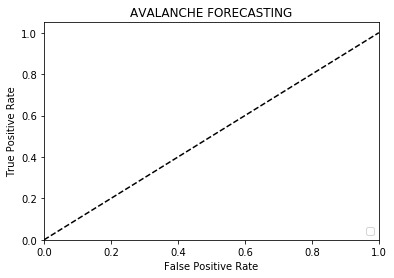

In [56]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 0
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], rfcpred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve {} (area = %0.2f)' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AVALANCHE FORECASTING')
plt.legend(loc="lower right")
plt.show()

In [43]:
#prediction

In [44]:
#89.90	59	0	52	-17	19
#89.90	59	H	52	-17	19	
#69.82	24	L	23	-8	19

rfc_p2=rfc.predict(sc.transform([[0,1,0,69.82,24,23,-8,19]]))
rfc_p2

array([0], dtype=int64)

In [45]:
rfc_p=rfc.predict(sc.transform([[1,0,0,15,21,45,54,36]]))

In [46]:
rfc_p

array([1], dtype=int64)

In [47]:
#data visualization

In [48]:
!pip install seaborn

In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
a=sns.load_dataset("avalanche")

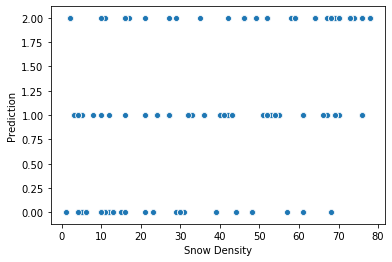

In [52]:
sns.scatterplot(x="Snow Density",y="Prediction",data=a)

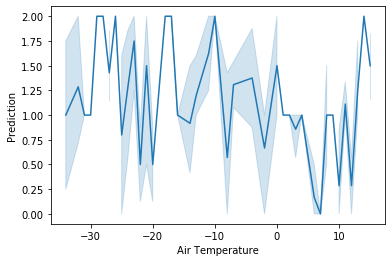

In [53]:
sns.lineplot(x="Air Temperature",y="Prediction",data=a) 

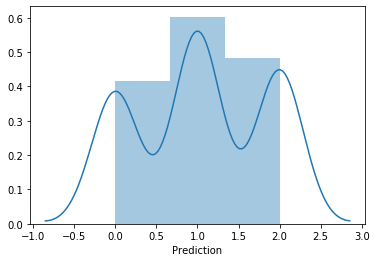

In [54]:
sns.distplot(a['Prediction'])

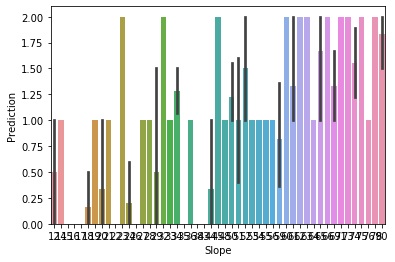

In [55]:
sns.barplot(x="Slope",y="Prediction",data=a)